<a href="https://colab.research.google.com/github/0ethel0zhang/de_wetter/blob/main/colab/DE_Wetter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Macro Data

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv("https://userpage.fu-berlin.de/soga/300/30100_data_sets/DWD.csv", 
                 sep=';', encoding = "latin-1")

In [53]:
def convert_values(x):
  try:
    return float(x.replace(",", "."))
  except:
    return x

In [55]:
df = df.applymap(convert_values)

In [20]:
df["FEDERAL STATE"].value_counts()

Bayern                    117
Baden-Württemberg          87
Hessen                     55
Niedersachsen              53
Nordrhein-Westfalen        46
Rheinland-Pfalz            39
Sachsen                    37
Schleswig-Holstein         37
Sachsen-Anhalt             32
Thüringen                  24
Mecklenburg-Vorpommern     24
Brandenburg                23
Saarland                   10
Hamburg                     7
Berlin                      6
Bremen                      2
Name: FEDERAL STATE, dtype: int64

In [29]:
df[(df["FEDERAL STATE"] == "Bayern") & (df["STATION NAME"].str.contains("München"))]
# Munich's weather will have the DWD_ID 3379 for München-Stadt
munich_id = 3379

In [33]:
df[df["STATION NAME"].str.contains("Berlin")]
# Berlin's weather will be proximated by the DWD_ID 433 for Berlin-Tempelhof for the latest data (2016)
berlin_id = 433

In [64]:
df[(df["STATION NAME"].str.contains("Hamburg"))]
# Hamburg-Fuhlsbüttel
hamburg_id = 1975

In [65]:
df[df.DWD_ID.isin([munich_id, berlin_id, hamburg_id])][['STATION NAME',
  'MEAN ANNUAL AIR TEMP',
  'MEAN MONTHLY MAX TEMP', 'MEAN MONTHLY MIN TEMP',
  'MEAN ANNUAL WIND SPEED', 'MEAN CLOUD COVER', 'MEAN ANNUAL SUNSHINE',
  'MEAN ANNUAL RAINFALL', 'MAX MONTHLY WIND SPEED', 'MAX AIR TEMP',
  'MAX WIND SPEED', 'MAX RAINFALL', 'MIN AIR TEMP',
  'MEAN RANGE AIR TEMP']]

,STATION NAME,MEAN ANNUAL AIR TEMP,MEAN MONTHLY MAX TEMP,MEAN MONTHLY MIN TEMP,MEAN ANNUAL WIND SPEED,MEAN CLOUD COVER,MEAN ANNUAL SUNSHINE,MEAN ANNUAL RAINFALL,MAX MONTHLY WIND SPEED,MAX AIR TEMP,MAX WIND SPEED,MAX RAINFALL,MIN AIR TEMP,MEAN RANGE AIR TEMP
46,Berlin-Tempelhof,9.6,13.4,5.8,3.0,66.0,1651.0,578.0,3.0,33.7,27.5,36.0,-13.7,7.6
207,Hamburg-Fuhlsbüttel,8.9,12.7,5.0,3.0,69.0,1569.0,756.0,4.0,32.0,27.5,35.0,-14.0,7.7
361,München-Stadt,9.5,13.6,5.5,2.0,65.0,1735.0,955.0,2.0,33.0,28.1,52.0,-13.8,8.1


## Macro trend
Seems like Munich rains more than Berlin (and even Hamburg). Can this be true?

# Daily data
More data description can be found on the **Climate Data Center** (CDC) website [here](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/more_precip/recent/DESCRIPTION_obsgermany_climate_daily_more_precip_recent_en.pdf)

In [98]:
# https://stackoverflow.com/questions/5710867/downloading-and-unzipping-a-zip-file-without-writing-to-disk
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
# or: requests.get(url).content
def read_zipfile(url):
  resp = urlopen(url)
  myzip = ZipFile(BytesIO(resp.read()))
  return myzip

In [ ]:
#@title Berlin Buch
url_400 = "https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/more_precip/recent/tageswerte_RR_00400_akt.zip"
myzip = read_zipfile(url_400)
# myzip.namelist()

In [84]:
df_400 = pd.read_csv(myzip.open('produkt_nieder_tag_20210715_20230115_00400.txt'),
            sep=';', encoding = "latin-1")

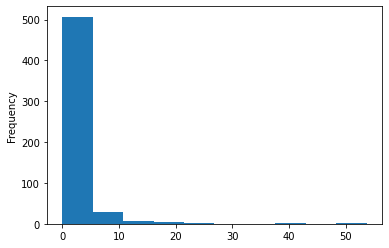

In [97]:
df_400["  RS"].plot.hist()

In [ ]:
#@title Munich data
url_3379 = "https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/more_precip/recent/tageswerte_RR_03379_akt.zip"
myzip = read_zipfile(url_3379)
# myzip.namelist()

In [101]:
df_3379 = pd.read_csv(myzip.open('produkt_nieder_tag_20210715_20230115_03379.txt'),
            sep=';', encoding = "latin-1")

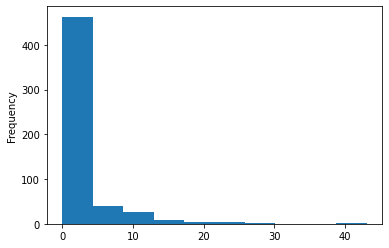

In [103]:
df_3379["  RS"].plot.hist()

## Check t-score

In [104]:
from scipy.stats import ttest_ind, ttest_ind_from_stats

In [107]:
df_400["  RS"].describe()

count    550.000000
mean       1.431636
std        3.979339
min        0.000000
25%        0.000000
50%        0.000000
75%        1.200000
max       53.700000
Name:   RS, dtype: float64

In [108]:
df_3379["  RS"].describe()

count    550.000000
mean       2.266909
std        4.699866
min        0.000000
25%        0.000000
50%        0.000000
75%        2.400000
max       43.100000
Name:   RS, dtype: float64

In [105]:
t, p = ttest_ind(df_400["  RS"], df_3379["  RS"], equal_var=False)

In [106]:
t, p

(-3.18092400789478, 0.0015103194818975973)

## The verdict
Using 550 days of data, we can confirm that berlin precipitates significantly less than Munich. In fact, it precipitates on average 3mm less.

Though it's interesting to note that the exact kind of precipitation is marked as unknown precipitation in almost all cases.